# World Happiness Index 2021

## 0. Procedimentos Iniciais

### 0.1. Importar bibliotecas

In [1]:
import numpy as np 
import pandas as pd                
import seaborn as sns 
import matplotlib.pyplot as plt               

In [2]:
# Definir o estilo geral dos gráficos
# A função set_style (style=None, rc=None) define os parâmetros que controlam o estilo geral dos gráficos. 
# Os parâmetros de estilo controlam propriedades como a cor do plano de fundo e se uma grade está habilitada por padrão. 
# Isso é feito usando o sistema matplotlib rcParams.
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

### 0.2. Carregar e visualizar dados

In [3]:
dados = pd.read_csv('Dados/WHR-2021.csv')
dados.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## 1. Descrição e limpeza dos dados

In [4]:
# Criar uma cópia da base de dados original e trabalhar a partir dela
dados1 = dados.copy()

In [5]:
# Listar todas as variáveis do conjunto de dados
dados1.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

#### O que cada coluna representa?

- `Country name`: Nome do país
- `Regional indicator`: Indicador regional
- `Ladder score`: Índice de Felicidade
- `Standard error of ladder score`: Erro padrão do Índice de Felicidade
- `upperwhisker`: Limite superior
- `lowerwhisker`: Limite inferior
- `Logged GDP per capita`: PIB per capita
- `Social support`: Suporte social
- `Healthy life expectancy`: Expectativa de vida saúdavel
- `Freedom to make life choices`: Liberdade para fazer escolhas
- `Generosity`: Generosidade
- `Perceptions of corruption`: Percepção da corrupção
- `Ladder score in Dystopia`: Índice de Felicidade em Distopia
- `Explained by: Log GDP per capita`: O quanto do índice de felicidade é explicado pelo PIB per capita
- `Explained by: Social support`: O quanto do índice de felicidade é explicado pelo suporte social
- `Explained by: Healthy life expectancy`: O quanto do índice de felicidade é explicado pela expectativa de vida saúdavel
- `Explained by: Freedom to make life choices`: O quanto do índice de felicidade é explicado pela liberdade para fazer escolhas
- `Explained by: Generosity`: O quanto do índice de felicidade é explicado pela generosidade
- `Explained by: Perceptions of corruption`: O quanto do índice de felicidade é explicado pela percepção de corrupção
- `Dystopia + residual`: Distopia + resíduo

In [6]:
# Renomear variáveis
dados1 = dados1.rename({'Country name':'país', 
                        'Regional indicator':'regiao',
                        'Ladder score':'indice_de_felicidade', 
                        'Logged GDP per capita':'PIB_per_capita', 
                        'Social support':'suporte_social', 
                        'Healthy life expectancy':'expectativa_de_vida', 
                        'Freedom to make life choices':'liberdade_de_escolhas', 
                        'Generosity':'generosidade', 
                        'Perceptions of corruption':'percepcao_de_corrupcao'}, 
                         axis = 1)

### 1.1. Dimensões e tipos das variáveis

In [7]:
# Verificar o número de observações (linhas) e variáveis (colunas) do conjunto de dados
print('Número de observações (linhas): {}.'.format(dados1.shape[0]))
print('Número de variáveis (colunas): {}.'.format(dados1.shape[1]))

Número de observações (linhas): 149.
Número de variáveis (colunas): 20.


In [8]:
# Verificar o tipo dos dados
dados1.dtypes

país                                           object
regiao                                         object
indice_de_felicidade                          float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
PIB_per_capita                                float64
suporte_social                                float64
expectativa_de_vida                           float64
liberdade_de_escolhas                         float64
generosidade                                  float64
percepcao_de_corrupcao                        float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

### 1.2. Checar NA

In [9]:
# Checar se há observações com dados faltantes
dados1.isna().sum()

país                                          0
regiao                                        0
indice_de_felicidade                          0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
PIB_per_capita                                0
suporte_social                                0
expectativa_de_vida                           0
liberdade_de_escolhas                         0
generosidade                                  0
percepcao_de_corrupcao                        0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

### 1.3. Limpeza dos dados

In [10]:
# Deletar as possíveis observações repetidas
dados1 = dados1.drop_duplicates(subset = ['país'], keep = 'last')

In [11]:
# Selecionar apenas as colunas que serão utilizadas na análise
colunas_selecionadas = ['país', 'regiao', 'indice_de_felicidade', 'PIB_per_capita', 'suporte_social', 'expectativa_de_vida',
                        'liberdade_de_escolhas', 'generosidade', 'percepcao_de_corrupcao']

In [12]:
dados2 = dados1[colunas_selecionadas].copy()

## 2. Análise exploratória dos dados

### 2.1. Os 10 países com maiores índices de felicidade

In [13]:
df = dados2[['país', 'indice_de_felicidade']]
top10 = df.head(10)
top10

,país,indice_de_felicidade
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464
5,Norway,7.392
6,Sweden,7.363
7,Luxembourg,7.324
8,New Zealand,7.277
9,Austria,7.268


### 2.2. Os 10 países com menores índices de felicidade

In [14]:
df = dados2[['país', 'indice_de_felicidade']]
bottom10 = df.tail(10)
bottom10

,país,indice_de_felicidade
139,Burundi,3.775
140,Yemen,3.658
141,Tanzania,3.623
142,Haiti,3.615
143,Malawi,3.600
144,Lesotho,3.512
145,Botswana,3.467
146,Rwanda,3.415
147,Zimbabwe,3.145
148,Afghanistan,2.523


### 2.3. Número de países por região

In [15]:
dados3 = dados2[['país', 'regiao']].groupby('regiao')
total_pais = dados3.count().sort_values('país', ascending = False).reset_index()
total_pais.head(10)

,regiao,país
0,Sub-Saharan Africa,36
1,Western Europe,21
2,Latin America and Caribbean,20
3,Central and Eastern Europe,17
4,Middle East and North Africa,17
5,Commonwealth of Independent States,12
6,Southeast Asia,9
7,South Asia,7
8,East Asia,6
9,North America and ANZ,4


### 2.4. Quantidade de países por região

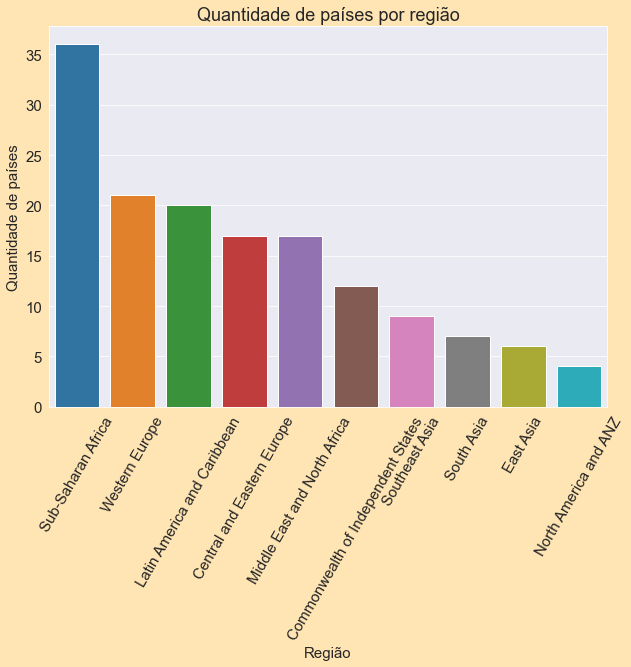

In [16]:
ax = sns.barplot(
    data = total_pais,
    x = 'regiao',
    y = 'país',
)

ax.set(
    title='Quantidade de países por região',
    xlabel='Região',
    ylabel='Quantidade de países'
)

plt.xticks(rotation = 60);

### 2.5. Felicidade média por região

In [17]:
dados3 = dados2[['indice_de_felicidade', 'regiao']].groupby('regiao')
total_pais = dados3.mean().sort_values('indice_de_felicidade', ascending = False).reset_index()
total_pais.head(10)

,regiao,indice_de_felicidade
0,North America and ANZ,7.128500
1,Western Europe,6.914905
2,Central and Eastern Europe,5.984765
3,Latin America and Caribbean,5.908050
4,East Asia,5.810333
5,Commonwealth of Independent States,5.467000
6,Southeast Asia,5.407556
7,Middle East and North Africa,5.219765
8,Sub-Saharan Africa,4.494472
9,South Asia,4.441857


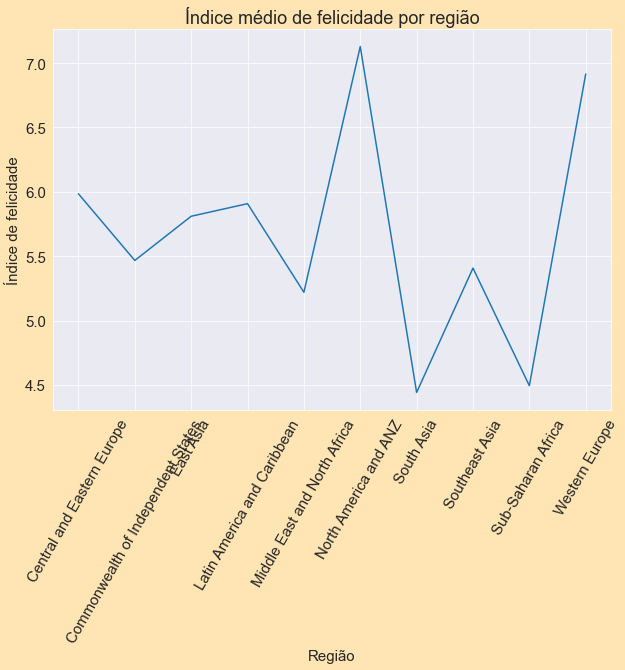

In [18]:
ax = sns.lineplot(
    data = total_pais,
    x = 'regiao',
    y = 'indice_de_felicidade',
)

ax.set(
    title='Índice médio de felicidade por região',
    xlabel='Região',
    ylabel='Índice de felicidade'
)

plt.xticks(rotation = 60);

### 2.6. PIB por região

In [19]:
PIB_regiao = dados2.groupby('regiao')['PIB_per_capita'].sum()
PIB_regiao

regiao
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: PIB_per_capita, dtype: float64

Text(0, 0.5, '')

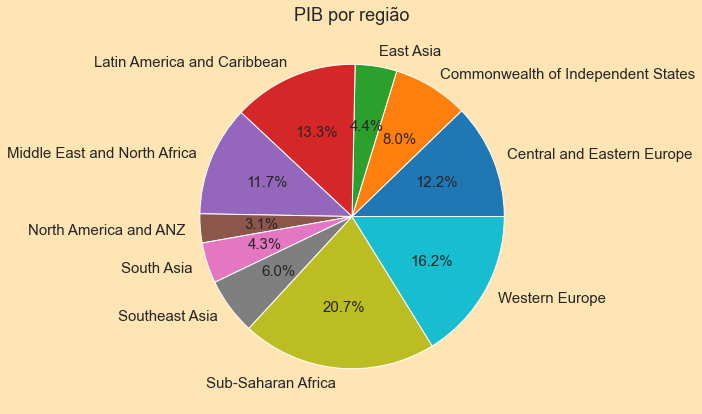

In [20]:
PIB_regiao.plot.pie(autopct = '%1.1f%%')
plt.title('PIB por região')
plt.ylabel('')

### 2.7. 10 países com maior percepção de corrupção

<BarContainer object of 10 artists>

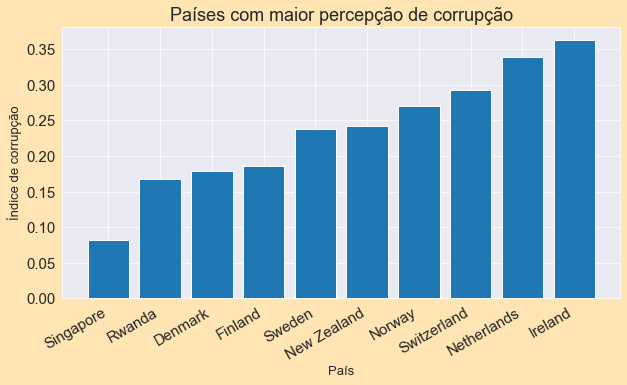

In [21]:
dados4 = dados2.sort_values(by = 'percepcao_de_corrupcao').head(10)
plt.rcParams['figure.figsize'] = (10,5)
plt.title('Países com maior percepção de corrupção')
plt.xlabel('País', fontsize = 13)
plt.ylabel('Índice de corrupção', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(dados4.país, dados4.percepcao_de_corrupcao)

### 2.8. Média da percepção da corrupção por região

In [22]:
corrupcao = dados2.groupby('regiao')[['percepcao_de_corrupcao']].mean()
corrupcao

,percepcao_de_corrupcao
regiao,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

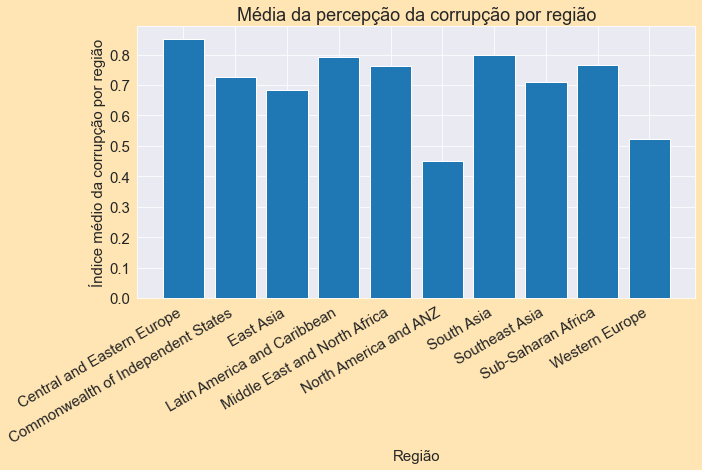

In [23]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Média da percepção da corrupção por região')
plt.xlabel('Região', fontsize = 15)
plt.ylabel('Índice médio da corrupção por região', fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corrupcao.index, corrupcao.percepcao_de_corrupcao)

### 2.9. Correlação entre as variáveis

<ipython-input-24-bd93c51faa30>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool),


<AxesSubplot:>

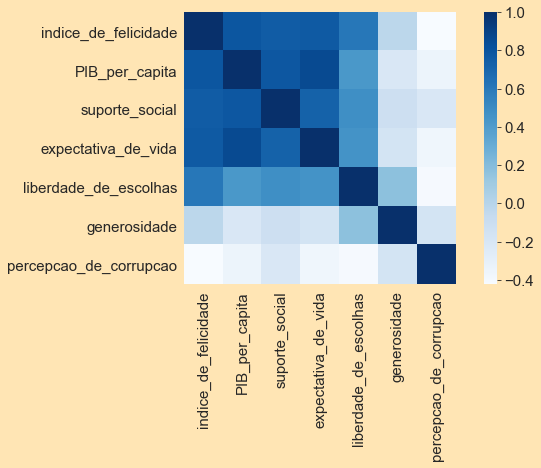

In [24]:
# Correlation Map
cor = dados2.corr(method = 'pearson')
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool),
           cmap = "Blues", square = True, ax = ax)

### 2.10. Felicidade x PIB

Text(0, 0.5, 'PIB per capita')

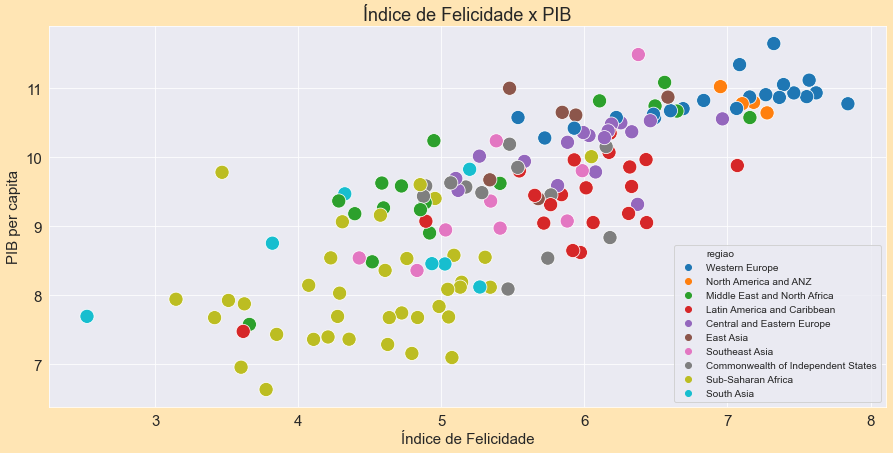

In [25]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Índice de Felicidade x PIB')
sns.scatterplot(x = dados2.indice_de_felicidade, y = dados2.PIB_per_capita, hue = dados2.regiao, s = 200)

plt.legend(loc = 'lower right', fontsize = '10')
plt.xlabel('Índice de Felicidade')
plt.ylabel('PIB per capita')

### 2.11. Felicidade x Expectativa de vida

Text(0, 0.5, 'Expectativa de Vida')

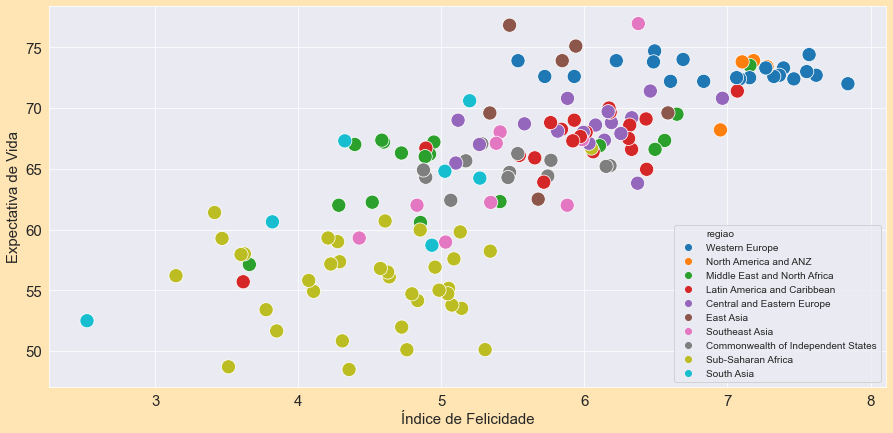

In [26]:
plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x = dados2.indice_de_felicidade, y = dados2.expectativa_de_vida, hue = dados2.regiao, s = 200)
plt.legend(loc='lower right', fontsize='10')
plt.xlabel('Índice de Felicidade')
plt.ylabel('Expectativa de Vida')

### 2.12. Felicidade x Liberdade de fazer escolhas

Text(0, 0.5, 'Liberdade de fazer escolhas')

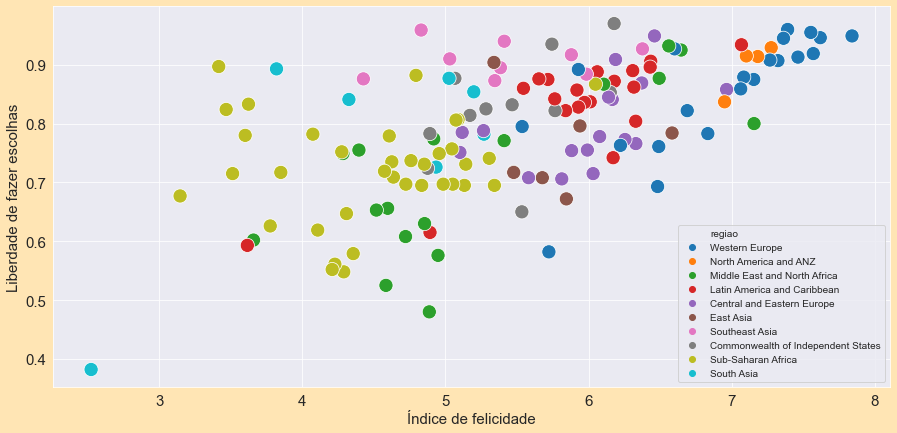

In [27]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = dados2.indice_de_felicidade, y = dados2.liberdade_de_escolhas, hue = dados2.regiao, s = 200)
plt.legend(loc = 'lower right', fontsize = '10')
plt.xlabel('Índice de felicidade')
plt.ylabel('Liberdade de fazer escolhas')

### 2.13. Felicidade x Percepção da corrupção

Text(0, 0.5, 'Percepção da Corrupção')

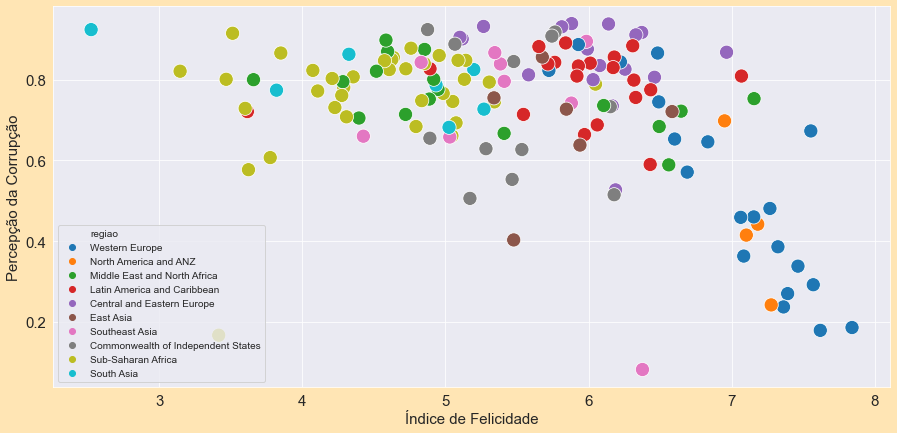

In [28]:
plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x = dados2.indice_de_felicidade, y = dados2.percepcao_de_corrupcao, hue = dados2.regiao, s = 200)
plt.legend(loc='lower left', fontsize='10')
plt.xlabel('Índice de Felicidade')
plt.ylabel('Percepção da Corrupção')

### 2.14. Felicidade x Suporte social

Text(0, 0.5, 'Suporte Social')

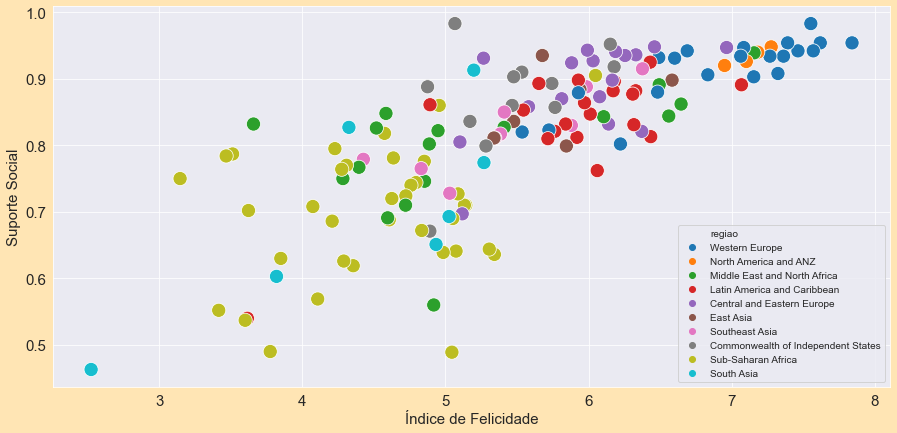

In [29]:
plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x = dados2.indice_de_felicidade, y = dados2.suporte_social, hue = dados2.regiao, s = 200)
plt.legend(loc='lower right', fontsize='10')
plt.xlabel('Índice de Felicidade')
plt.ylabel('Suporte Social')

### 2.15. Felicidade x Generosidade

Text(0, 0.5, 'Generosidade')

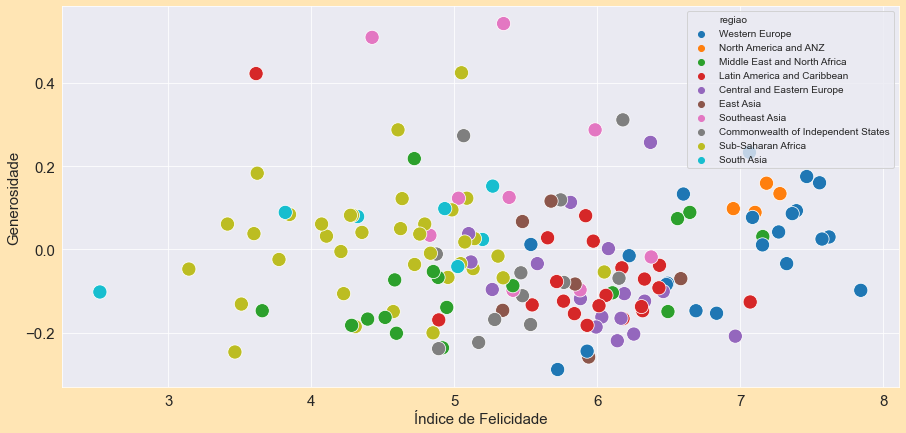

In [30]:
plt.rcParams['figure.figsize']=(15, 7)
sns.scatterplot(x = dados2.indice_de_felicidade, y = dados2.generosidade, hue = dados2.regiao, s = 200)
plt.legend(loc='upper right', fontsize='10')
plt.xlabel('Índice de Felicidade')
plt.ylabel('Generosidade')

In [31]:
dados2.to_csv('Dados/felicidade.csv', encoding = 'utf-8', index = False)

### FIM